In [49]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import cv2
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [50]:
# prepare the data
XRootData = np.load("DataForSVM/XRootDATA.npy")
Xlist = list(XRootData)
print(XRootData[0])

[0.579664 0.320268 0.892814 0.557149 0.385559 0.837381 0.540808 0.374829
 0.823098 0.499919 0.391041 0.866724 0.463243 0.388366 0.894381 0.575477
 0.388358 0.809193 0.628653 0.380164 0.79408  0.691891 0.350359 0.888742
 0.5      0.5      0.649912 0.502013 0.502731 0.607399 0.495953 0.649857
 0.675133 0.504014 0.769786 0.701661 0.504012 0.497314 0.466601 0.399832
 0.486417 0.454518 0.316109 0.483769 0.478665 0.577451 0.306741 0.91797
 0.       0.       0.       0.557084 0.320232 0.844579 0.       0.
 0.       0.275302 0.478353 0.305748 0.283364 0.486442 0.327499 0.299819
 0.481117 0.410191 0.53069  0.780723 0.684363 0.526492 0.786074 0.713486
 0.497998 0.786081 0.773293]


In [51]:
newX = []
for idx, val in enumerate(Xlist):
    testList = list(Xlist[idx])
    del testList[2::3]
    newX.append(testList)
    
print(newX[0])
print(len(newX[0]))
print(len(newX))

np.save("DataForSVM/XCoordXYData", newX) # only the xy values

[0.5796640000000001, 0.32026799999999994, 0.557149, 0.38555899999999993, 0.5408080000000001, 0.3748289999999999, 0.499919, 0.3910409999999999, 0.46324300000000007, 0.38836599999999993, 0.575477, 0.3883579999999999, 0.628653, 0.38016399999999995, 0.691891, 0.3503589999999999, 0.5, 0.5, 0.502013, 0.5027309999999999, 0.495953, 0.6498569999999999, 0.504014, 0.7697859999999999, 0.504012, 0.4973139999999999, 0.399832, 0.4864169999999999, 0.31610900000000003, 0.4837689999999999, 0.577451, 0.30674099999999993, 0.0, 0.0, 0.557084, 0.3202319999999999, 0.0, 0.0, 0.27530200000000005, 0.4783529999999999, 0.283364, 0.48644199999999993, 0.299819, 0.4811169999999999, 0.53069, 0.780723, 0.526492, 0.7860739999999999, 0.49799800000000005, 0.7860809999999999]
50
6958


In [53]:
X = np.load("DataForSVM/XCoordXYData.npy")
y = np.load("DataForSVM/yRootLabels.npy")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(len(X_train[0]))
print(len(X_train))
print(len(X_test))

50
5566
1392


In [54]:
y_train_binarized = label_binarize(y_train, classes = [0,1,2,3,4,5,6,7])
y_test_binarized = label_binarize(y_test, classes = [0,1,2,3,4,5,6,7])

print(X_train[:2])
print(y_train[:2])
print(X_test[:2])
print(y_test[:2])
print(y_train_binarized[:2])
print("ytestbin:",y_test_binarized[:2])

[[0.583838 0.35009  0.555159 0.407303 0.536767 0.399059 0.485647 0.41016
  0.436605 0.418196 0.577588 0.412712 0.632772 0.39639  0.679726 0.366298
  0.5      0.5      0.487692 0.4917   0.397889 0.47817  0.314107 0.48905
  0.508192 0.518984 0.487826 0.628019 0.489825 0.739696 0.577657 0.344593
  0.       0.       0.559241 0.355541 0.       0.       0.528602 0.756158
  0.524487 0.755947 0.485705 0.756131 0.29172  0.489042 0.291664 0.478157
  0.305932 0.486277]
 [0.620432 0.467344 0.583624 0.500006 0.577568 0.48369  0.546894 0.464496
  0.516317 0.439957 0.593893 0.510895 0.63471  0.548909 0.679675 0.551843
  0.5      0.5      0.501989 0.48096  0.46927  0.404652 0.403985 0.333851
  0.499953 0.521813 0.491783 0.633486 0.499996 0.728862 0.618367 0.461867
  0.       0.       0.602098 0.461757 0.       0.       0.526498 0.745211
  0.522393 0.742498 0.497838 0.745185 0.387593 0.290134 0.387547 0.292971
  0.401812 0.325642]]
[0 3]
[[0.499902 0.30372  0.49998  0.369045 0.469307 0.369089 0.434616 

In [55]:
random_state = np.random.RandomState(0)
import time
start_time = time.time()
#Create the classifier
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state = random_state))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Predict the test data
y_pred = clf.predict(X_test)

print("Time: %s seconds" % (time.time()-start_time))
print(y_pred[:2])

Time: 4.668478727340698 seconds
[6 3]


In [56]:
#save model
import pickle
filename = 'Models/svm_model_justCoord_features.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [57]:
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred, target_names = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']))

                 precision    recall  f1-score   support

      Arabesque       1.00      0.99      1.00       190
      Demi-Plie       0.99      1.00      1.00       184
      Developpe       0.99      0.77      0.87       175
         Penche       1.00      1.00      1.00       169
         Retire       0.99      0.99      0.99       168
Second-Position       1.00      1.00      1.00       155
       Sus-sous       1.00      1.00      1.00       185
          Tendu       0.81      1.00      0.89       166

       accuracy                           0.97      1392
      macro avg       0.97      0.97      0.97      1392
   weighted avg       0.97      0.97      0.97      1392



In [58]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9691091954022989


In [59]:
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall: 0.9692825814536341


In [60]:
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precision: 0.9733848590230594


In [61]:
print("F1 score:", metrics.f1_score(y_test,y_pred, average = 'macro'))

F1 score: 0.9682920684304511


EER:0.0036893526863057908
Equal Error Rate: 0.0036893526863057908


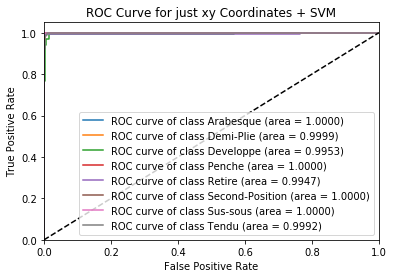

In [62]:
import matplotlib.pyplot as plt
#ROC and AUC
fpr = dict()
tpr = dict()
fnr = dict()
eer = dict()
totalEER = 0
roc_auc = dict()
n_classes = 8

#print(y_test.shape)
#print(y_score.shape)
#print(y_test_binarized.shape)
#Compute ROC curve for each class:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    fnr[i] = 1 - tpr[i]
    eer[i] = fpr[i][np.nanargmin(np.absolute((fnr[i]-fpr[i])))]
    totalEER += eer[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
    
averageEER = totalEER/8
print("EER:" +averageEER.astype(str))
print('Equal Error Rate: {0:0.19f}'''.format(averageEER))
    
#Compute micro-average ROC curve and ROC area
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#Plot ROC Curves:
plt.figure()

# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]))

arr_classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(arr_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for just xy Coordinates + SVM')
plt.legend(loc="lower right")
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test_binarized,y_score, average = 'macro'))

ROC AUC Score: 0.9986265585279743


In [64]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[189   0   0   0   1   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 135   0   0   0   0  40]
 [  0   0   0 169   0   0   0   0]
 [  0   1   1   0 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]


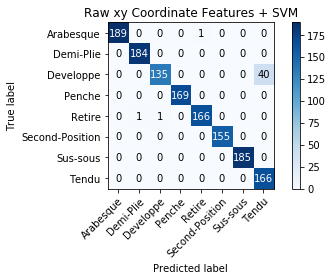

In [65]:
#Plot a confusion matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.Blues
classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Raw xy Coordinate Features + SVM',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [66]:
# get the FP, FN, TP, TN values
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
print("FP:", FP)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("FN:", FN)
TP = np.diag(conf_matrix)
print("TP:", TP)
TN = conf_matrix.sum() - (FP + FN + TP)
print("TN:", FP)

[[189   0   0   0   1   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 135   0   0   0   0  40]
 [  0   0   0 169   0   0   0   0]
 [  0   1   1   0 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]
FP: [ 0  1  1  0  1  0  0 40]
FN: [ 1  0 40  0  2  0  0  0]
TP: [189 184 135 169 166 155 185 166]
TN: [ 0  1  1  0  1  0  0 40]


In [67]:
FAR = (sum(FP))/(sum(FP)+sum(TN))
print("My FAR:", FAR)

My FAR: 0.004412972085385878


In [68]:
totalFAR = 0
for x in range(8):
    totalFAR += (FP[x])/(FP[x]+TN[x])
print("TotalFAR:", totalFAR)
avg = totalFAR/8
print("Computed Average FAR:", avg)

TotalFAR: 0.035092928126722815
Computed Average FAR: 0.004386616015840352


In [69]:
FRR = (sum(FN))/(sum(FN)+sum(TP))
print("My FRR:", FRR)

My FRR: 0.03089080459770115


In [70]:
totalFRR = 0
for x in range(8):
    totalFRR += (FN[x])/(FN[x]+TP[x])
print("TotalFRR:", totalFRR)
avg = totalFRR/8
print("Computed Average FRR:", avg)

TotalFRR: 0.2457393483709273
Computed Average FRR: 0.030717418546365914


In [71]:
#Specificity: TN/(TN+FP)
totalSpecificity = 0
for x in range(8):
    totalSpecificity += (TN[x])/(TN[x]+FP[x])
print("TotalSpecificity:", totalSpecificity)
avg = totalSpecificity/8
print("Computed Average Specificity:", avg)

TotalSpecificity: 7.964907071873277
Computed Average Specificity: 0.9956133839841597


In [72]:
#y_score = clf.predict_proba(X_test)
print(y_score[:1])

[[-2.08440167 -1.23233159 -2.46079749 -1.57944729 -1.25055542 -1.369452
   0.7006088  -1.84575683]]
